# MOwNiT Laboratorium 1

## Zadanie 1

Porównać reprezentację bitową liczby 1/3 dla float32, float64 oraz liczby, która jest inicjalizowana jako float32, a potem rzutowana na float64.

In [1]:
import numpy as np

print(np.float32(1/3), np.float64(1/3), np.float64(np.float32(1/3)))

0.33333334 0.3333333333333333 0.3333333432674408


## Zadanie 2

Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi reprezentowanymi w komputerze. Narysować wykres zależności odległości od wartości liczby dla zakresu od 1.0 do 1000.0 z krokiem 1.0.

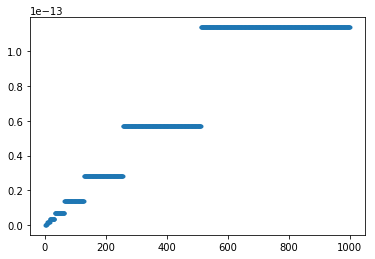

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Zakres 1.0 do 1000.0 z krokiem 1.0
x = np.linspace(1, 1000, 1000)
y = (lambda a: np.nextafter(a, a+1) - a)(x)

plt.plot(x, y, '.')
plt.show()

## Zadanie 3

Korzystając ze wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Poniższa funkcja zamienia float z postaci dziesiętnej do postaci określonej przez format IEEE 754.

In [3]:
import struct

def float_to_binary32(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')

Mantysa przestaje być znormalizowana dla liczb bardzo bliskich zera. Spełniona jest wtedy zależność: $\forall_i e_i =0 \wedge \exists_j m_j \neq 0$, tj. wszystkie bity cechy są zerami i istnieje bit mantysy, który nie jest zerem. Zabieg ten ma na celu umożliwienie reprezentacji bardzo małych liczb. Najmniejszą dodatnią liczbą, którą można przedstawić za pomocą mantysy znormalizowanej jest $2^{-126}$, a zdenormalizowanej - $2^{-149}$.

In [4]:
print(float_to_binary32(2**(-126)))
print(float_to_binary32(2**(-127)))

00000000100000000000000000000000
00000000010000000000000000000000


Zgodnie z oczekiwaniami, gdy zejdziemy poniżej liczby $2^{-126}$ widzimy, że wszystkie bity cechy są zerami i zaczynamy operować na liczbach zdenormalizowanych.

## Zadanie 4

Wymyślić własny przykład algorytmu niestablinego numerycznie.

- Zademostrować wersję niestabilną, pokazać, że działa źle.
- Wyjaśnić, dlaczego działa źle.
- Zademonstować wersję stabilną.
- Język dowolny.

Maszynowa liczba zmiennoprzecinkowej jest wyrażona wzorem: $\hspace{0.2cm}fl(a\circ b) = (a\circ b)(1 + \delta), \hspace{0.2cm} |\delta| \leq 2^{-t}$, gdzie $\delta$ jest rzeczywistym reprezentacji. Rozpatrzmy dwa podejścia do rozwiązania tego samego problemu:

$$A \to a^2 - b^2$$

$$B \to (a-b)(a+b)$$

Algorytm A:

$$fl(A) = (a^2(1+\delta_1) - b^2(1+\delta_2))(1+\delta_3) =$$

$$=(a^2 - b^2)(\frac{a^2(1+\delta_1) - b^2(1+\delta_2)}{a^2-b^2})(1+\delta_3) =$$

$$=(a^2-b^2)(1+\delta_3 +(1+\delta_3)(\frac{a^2\delta_1-b^2\delta_2}{a^2-b^2})) = (a^2 - b^2)(1+\epsilon_A)$$

Widzimy, że gdy $\delta_1\delta_2 < 0 \wedge a^2 \approx b^2$ to $\epsilon_A$ jest bardzo duży.

Algorytm B:

$$fl(B)=(a-b)(1+\delta_1)(a+b)(1+\delta_2)(1+\delta_3) =$$

$$=(a^2 - b^2)(1+\delta_1)(1+\delta_2)(1+\delta_3) =$$

$$=(a^2-b^2)(1 + \delta_1+\delta_2+\delta_1\delta_2)(1+\delta_3) =$$

$$= (a^2-b^2)(1+\delta_1+\delta_2+\delta_3+\delta_1\delta_2 + \delta_1\delta_3 + \delta_2\delta_3 + \delta_1\delta_2\delta_3)=(a^2-b^2)(1+\epsilon_B)$$

Iloczyny delt są zaniedbywalnie małe, dlatego możemy przyjać, że $\epsilon_B=\delta_1+\delta_2+\delta_3$
W takim przypadku $\epsilon_B \leq 3|\displaystyle\max_i\delta_i|$

In [5]:
a = 1/(10**17)
b = 1/(10**17+1)

A = a**2 - b**2
B = (a-b)*(a+b)

print(A, B)

2.1382117680737565e-50 3.081487911019577e-50


Algorytm B jest stabilniejszy niż algorytm A - zaburzenia jego wyniku, w porównaniu do B, wynikają głównie z niedokładnej reprezentacji liczb w komputerze. Nie są to duże różnice, no ale przy intensywnych obliczeniach mogą rozpropagować się na resztę wyników.